Kütüphaneleri yükleme

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Gereksiz uyarıları gizler

# Dosyanın bilgisayarındaki tam yolunu belirtiyoruz
dosya_yolu = "/Users/includeseysi/Desktop/AktüeryaAnalizVerileri/insurance.csv"
df = pd.read_csv(dosya_yolu) 

# Grafiklerin Jupyter içinde şık görünmesi için tema ayarı
sns.set_theme(style="whitegrid")
print("Kütüphaneler yüklendi ve veri hazır! ✅")

Kütüphaneler yüklendi ve veri hazır! ✅


Grafik 1 (İş Birimi İçin Sigara/Prim Analizi)

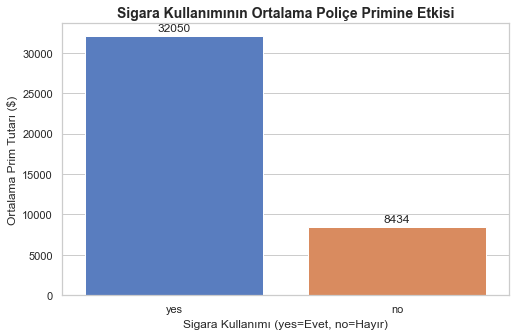

In [5]:
# 2. HÜCRE: Yöneticiler İçin Sigara ve Prim Analizi Grafiği

plt.figure(figsize=(8, 5))

# ci=None ile hata çubuklarını kaldırıyoruz (Eski sürümlerle uyumlu)
ax = sns.barplot(x="smoker", y="charges", data=df, palette="muted", ci=None)

# Başlık ve Eksen İsimlendirmeleri
plt.title("Sigara Kullanımının Ortalama Poliçe Primine Etkisi", fontsize=14, fontweight='bold')
plt.xlabel("Sigara Kullanımı (yes=Evet, no=Hayır)", fontsize=12)
plt.ylabel("Ortalama Prim Tutarı ($)", fontsize=12)

# Eski Matplotlib sürümleriyle tam uyumlu bar üzerine değer yazdırma yöntemi
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Grafiği Ekrana Bas
plt.show()

Risk Kırılımı ve İş Kuralı Görseli

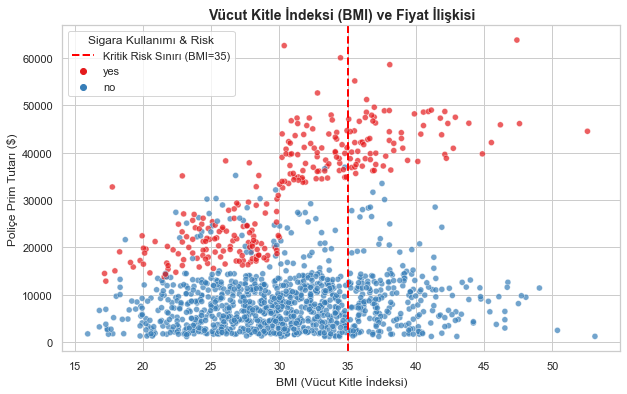

In [6]:
# 3. HÜCRE: Yöneticiler İçin BMI ve Risk Kırılımı Grafiği

plt.figure(figsize=(10, 6))

# Scatter plot ile BMI, Fiyat ve Sigara ilişkisini çiziyoruz
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", alpha=0.7)

# Başlık ve Eksen İsimlendirmeleri
plt.title("Vücut Kitle İndeksi (BMI) ve Fiyat İlişkisi", fontsize=14, fontweight='bold')
plt.xlabel("BMI (Vücut Kitle İndeksi)", fontsize=12)
plt.ylabel("Poliçe Prim Tutarı ($)", fontsize=12)

# Beraber yazdığımız 6. İş Kuralını (BMI=35 sınırı) kırmızı kesik çizgi ile ekliyoruz
plt.axvline(x=35, color='red', linestyle='--', linewidth=2, label='Kritik Risk Sınırı (BMI=35)')

# Açıklama (Legend) kutusunu ayarlıyoruz
plt.legend(title='Sigara Kullanımı & Risk', loc='upper left')

# Grafiği Ekrana Bas
plt.show()

Simülasyon

In [7]:
# 4. HÜCRE: Satış Temsilcisi Ekranı Simülasyonu (İş Kuralı Testi)

def satis_temsilcisi_ekrani(yas, bmi, sigara):
    print("="*60)
    print("📞 HIZLI TEKLİF SİSTEMİ (Satış Temsilcisi Ekranı)")
    print(f"Girilen Değerler -> Yaş: {yas} | BMI: {bmi} | Sigara: {sigara.upper()}")
    print("-" * 60)
    
    # Beraber Yazdığımız 6. Kural (Business Rule) Devrede!
    if bmi > 35 and sigara.lower() == "yes":
        print("🚨 YÜKSEK RİSK PROFİLİ TESPİT EDİLDİ!")
        print("İşlem Durduruldu: Bu müşteri için otomatik poliçe teklifi verilemez.")
        print("Aksiyon: Lütfen talebi detaylı sağlık beyanı ile birlikte Medikal Underwriting (Manuel Onay) departmanına yönlendiriniz.")
    else:
        print("✅ Risk profili uygun.")
        print("Aksiyon: Makine Öğrenmesi modeli arka planda çalıştırılıyor... Tahmini fiyat hesaplanıyor.")
    print("="*60)

# Kuralımızı Test Edelim: 
# 1. Müşteri (Bizim kırmızı çizgiyi geçen riskli müşteri)
satis_temsilcisi_ekrani(yas=55, bmi=38.5, sigara="yes")

print("\n")

# 2. Müşteri (Standart, risksiz müşteri)
satis_temsilcisi_ekrani(yas=30, bmi=24.2, sigara="no")

📞 HIZLI TEKLİF SİSTEMİ (Satış Temsilcisi Ekranı)
Girilen Değerler -> Yaş: 55 | BMI: 38.5 | Sigara: YES
------------------------------------------------------------
🚨 YÜKSEK RİSK PROFİLİ TESPİT EDİLDİ!
İşlem Durduruldu: Bu müşteri için otomatik poliçe teklifi verilemez.
Aksiyon: Lütfen talebi detaylı sağlık beyanı ile birlikte Medikal Underwriting (Manuel Onay) departmanına yönlendiriniz.


📞 HIZLI TEKLİF SİSTEMİ (Satış Temsilcisi Ekranı)
Girilen Değerler -> Yaş: 30 | BMI: 24.2 | Sigara: NO
------------------------------------------------------------
✅ Risk profili uygun.
Aksiyon: Makine Öğrenmesi modeli arka planda çalıştırılıyor... Tahmini fiyat hesaplanıyor.
